In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [6]:
import w2m

In [20]:
dia=1

cab = w2m.read_cab("data/omie/CAB_201805%02d.1"%dia)
det = w2m.read_det("data/omie/DET_201805%02d.1"%dia)
cur = w2m.read_curva_pbc_uof("data/omie/curva_pbc_uof_201805%02d.1"%dia)
mar = w2m.read_marginal_pbdc("data/omie/marginalpdbc_201805%02d.1"%dia)
det = det.join(cab, rsuffix="CAB")

## curvas de casación 

- construidas desde el fichero de detalle de ofertas
- construidas desde el fichero de casación (para verficar)

. . .


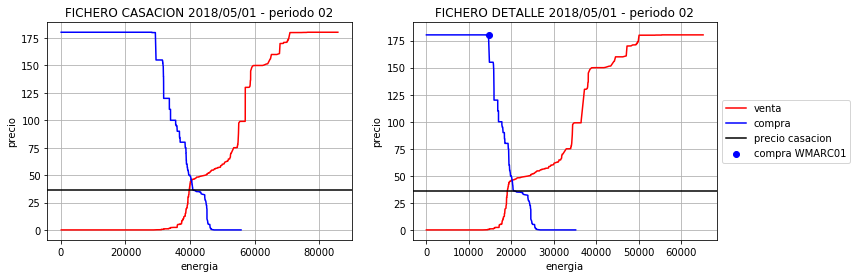

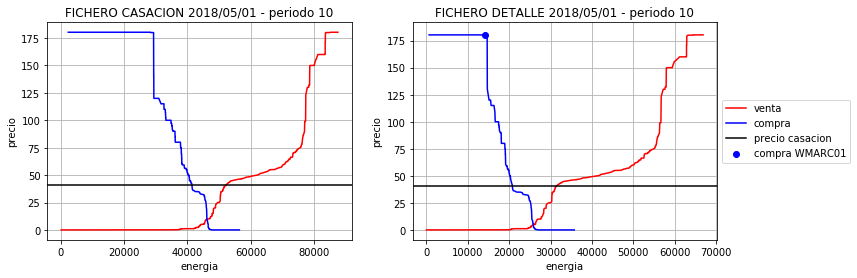

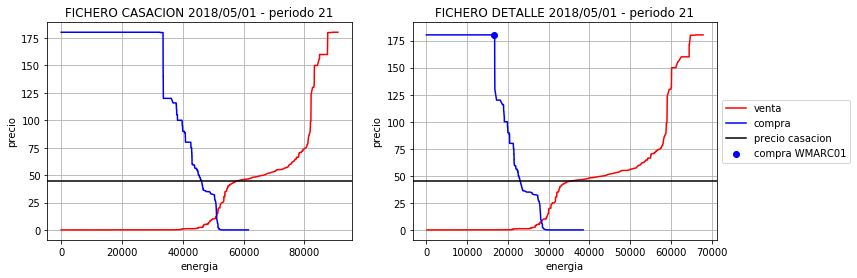

In [21]:
for periodo in [2,10,21]:
    print ".",
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    w2m.plot_curva_casacion(cur, mar, periodo=periodo, legend=False)
    plt.subplot(122)
    w2m.plot_curva_oferta_demanda(det, mar, periodo=periodo)
    

### Ofertas con beneficio

se seleccionan las ofertas:

- de venta cuyo precio ofertado queda sobre el de casación
- de compra cuyo precio ofertado queda bajo el de casación

el plot es **interactivo**, zoom y desliza sobre los puntos para ver información adicional

In [22]:
periodo = 21
print "dia %d, perdiodo %d"%(dia, periodo)


dia 1, perdiodo 21


In [37]:
reload(w2m)
w2m.plot_offer_profit(det,mar, periodo)

### preguntas

- hay unas pocas fechas en cabeceras muy antiguas
- las fechas son del mes anterior?
- hay muy pocas ofertas con vareur, fijeur != 0 (83 sobre 1258)
- la cabecera se obtiene del detalle o tiene información adicional?
- cuál es el país MI?
- en la curva de casación aparecen registros como "CASADO" pero con energía!=0 y precio=0
- why "flat top" en compra, flat bottom en venta
- campos versión, numbloq, etc.?
- qué información adicional provee curva_pbc_uof_20180501 respecto a hacer la curva con det?


- ¿coste de una oferta de compra o venta no casada?
- ¿cuál es el codigo de w2m? hay varios, de generación (ABA2, ARCH, BERR1, BERR2, etc.) y luego WMARC01


### casos a inspeccionar (dia 2018/05/01)
- 5251663, 4781627, detalles con precios y energia, pero cabecera a cero 
- 5250456, 5250769 oferta con grandes candidaes de energía, pero con precio cero


In [27]:
cab.loc[cab.index==5251663]

,version,unidad,descripcion,compra_venta,plazo,MaxRamSub,MaxRamBaj,Fijoeuro,Vareuro,MaxPot,MaxRamArr,MaxRamPar,cod_interconexion,year,mes,dia,hora,min,seg
codigo_oferta,,,,,,,,,,,,,,,,,,,
5251663,1,GNRVD60,UOF FESFW01,V,O,0.0,0.0,0.0,0.0,20.0,0.0,0.0,1,2018,4,30,11,54,54


In [36]:
det.loc[5251663][det.columns[:8]]

,version,periodo,NumBloq,unused,PrecEuro,energia,BloqInf,BloqRet
codigo_oferta,,,,,,,,
5251663,1,9,1,0.0,33.30,7.0,S,S
5251663,1,9,2,0.0,37.20,13.0,S,S
5251663,1,10,1,0.0,34.00,15.5,S,S
5251663,1,10,2,0.0,36.50,4.5,S,S
5251663,1,11,1,0.0,35.10,17.8,S,S
5251663,1,11,2,0.0,37.60,2.2,S,S
5251663,1,12,1,0.0,35.30,17.3,S,S
5251663,1,12,2,0.0,37.80,2.7,S,S
5251663,1,13,1,0.0,36.00,16.7,S,S
